# DataVisualization

In [1]:
import pandas as pd

# Download Data
data_path = 'covid_weather_dlnm.csv'
data = pd.read_csv(data_path)

#Data preprocessing
# Convert to datetime
data['date'] = pd.to_datetime(data['date'])

# Handle missing values: For meteorological data, use the data from the previous day to fill in (if the first day is missing, use the data from the next day)
weather_columns = ['Max_T', 'Avg_T', 'Min_T', 'Max_D', 'Avg_D', 'Min_D', 'Max_RH', 'Avg_RH', 'Min_RH',
                    'Max_WS', 'Avg_WS', 'Min_WS', 'Max_P', 'Avg_P', 'Min_P', 'DailyPrecip']
data[weather_columns] = data[weather_columns].fillna(method='ffill').fillna(method='bfill')

# View the processed data
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49985 entries, 0 to 49984
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   rank         49985 non-null  int64         
 1   fips         49985 non-null  int64         
 2   lon          49985 non-null  float64       
 3   lat          49985 non-null  float64       
 4   date         49985 non-null  datetime64[ns]
 5   t            49985 non-null  int64         
 6   case         49985 non-null  int64         
 7   death        49985 non-null  int64         
 8   county       49972 non-null  object        
 9   state        49972 non-null  object        
 10  pop          49985 non-null  int64         
 11  age          49985 non-null  float64       
 12  male         49985 non-null  float64       
 13  white        49985 non-null  float64       
 14  black        49985 non-null  float64       
 15  hisp         49985 non-null  float64       
 16  pove

C:\Users\0\AppData\Local\Temp\ipykernel_29600\2127075745.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[weather_columns] = data[weather_columns].fillna(method='ffill').fillna(method='bfill')


rank  fips        lon        lat       date  t  case  death     county  \
0    57  1073 -86.890254  33.563058 2020-03-01  1     0      0  Jefferson   
1    57  1073 -86.890254  33.563058 2020-03-02  2     0      0  Jefferson   
2    57  1073 -86.890254  33.563058 2020-03-03  3     0      0  Jefferson   
3    57  1073 -86.890254  33.563058 2020-03-04  4     0      0  Jefferson   
4    57  1073 -86.890254  33.563058 2020-03-05  5     0      0  Jefferson   

     state  ...  Min_RH  Max_WS  Avg_WS  Min_WS  Max_P  Avg_P  Min_P  \
0  Alabama  ...    28.0    20.0     8.0     0.0   29.6   29.5   29.4   
1  Alabama  ...    67.0    18.0     6.7     0.0   29.4   29.3   29.2   
2  Alabama  ...    59.0    17.0    10.1     0.0   29.3   29.2   29.1   
3  Alabama  ...    83.0    15.0     4.4     0.0   29.4   29.3   29.3   
4  Alabama  ...    80.0    13.0     5.4     0.0   29.5   29.4   29.3   

   DailyPrecip  dow  stayathome  
0         0.00    1         0.0  
1         0.13    2         0.0  
2         1.64    3         0.0  
3         0.52    4         0.0  
4         1.60    5         0.0  

[5 rows x 37 columns]

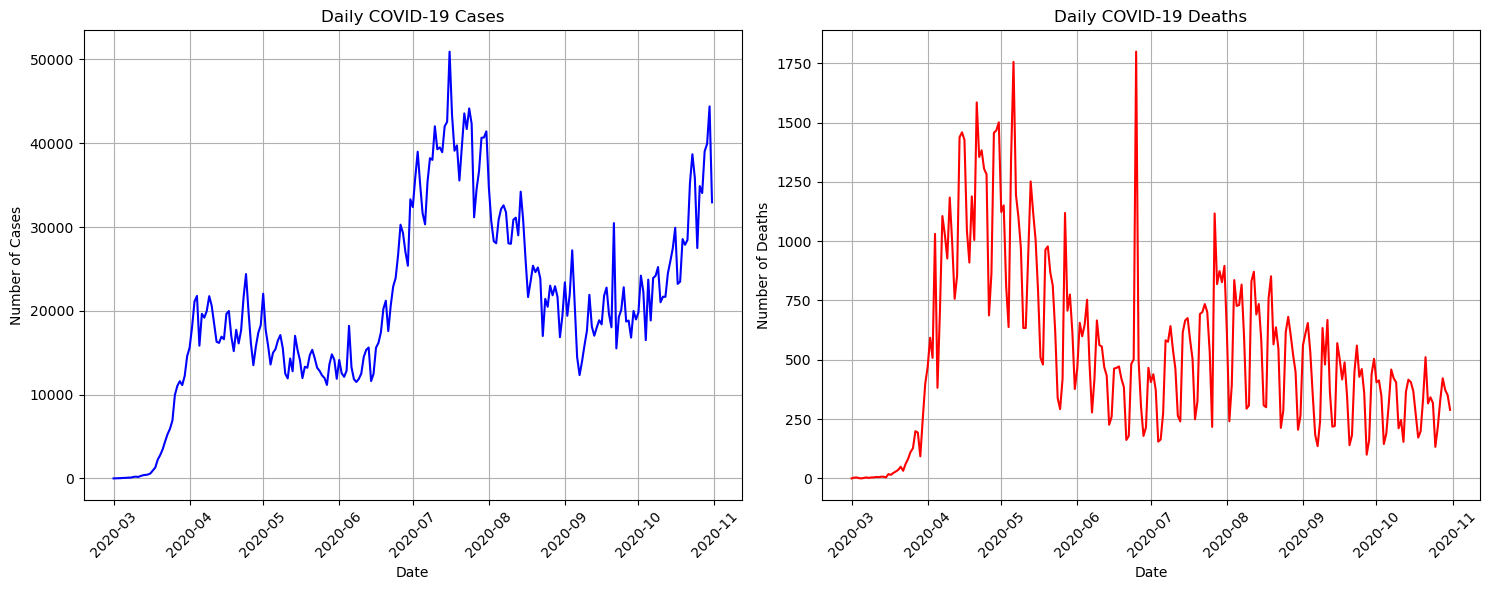

In [2]:
# Exploratory data mining
# Overall cases and deaths
# The overall number of cases has a certain changing trend over time, which may be due to temperature and humidity, and of course is also related to the formulation of policies.
import matplotlib.pyplot as plt
import seaborn as sns

daily_totals = data.groupby('date').agg({'case': 'sum', 'death': 'sum'}).reset_index()

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(daily_totals['date'], daily_totals['case'], label='Cases', color='blue')
plt.title('Daily COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.plot(daily_totals['date'], daily_totals['death'], label='Deaths', color='red')
plt.title('Daily COVID-19 Deaths')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

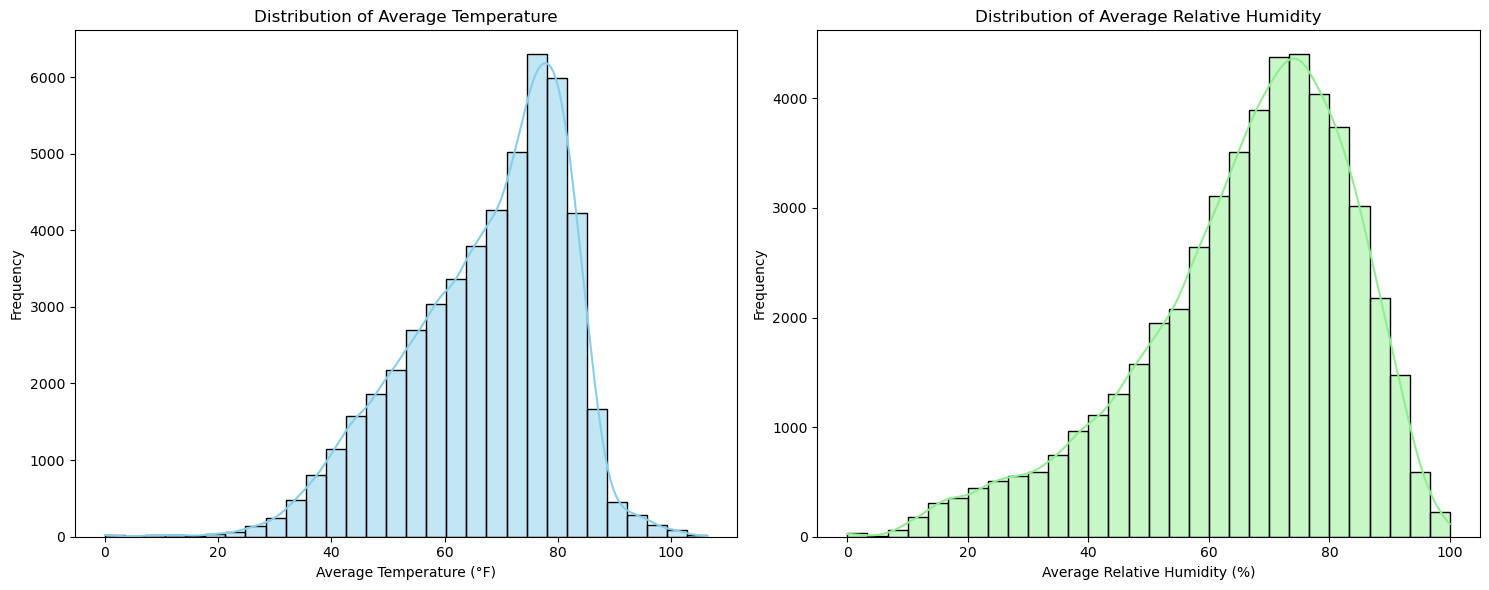

In [3]:
# Temperature and humidity distribution
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['Avg_T'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Average Temperature')
plt.xlabel('Average Temperature (°F)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data['Avg_RH'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Average Relative Humidity')
plt.xlabel('Average Relative Humidity (%)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

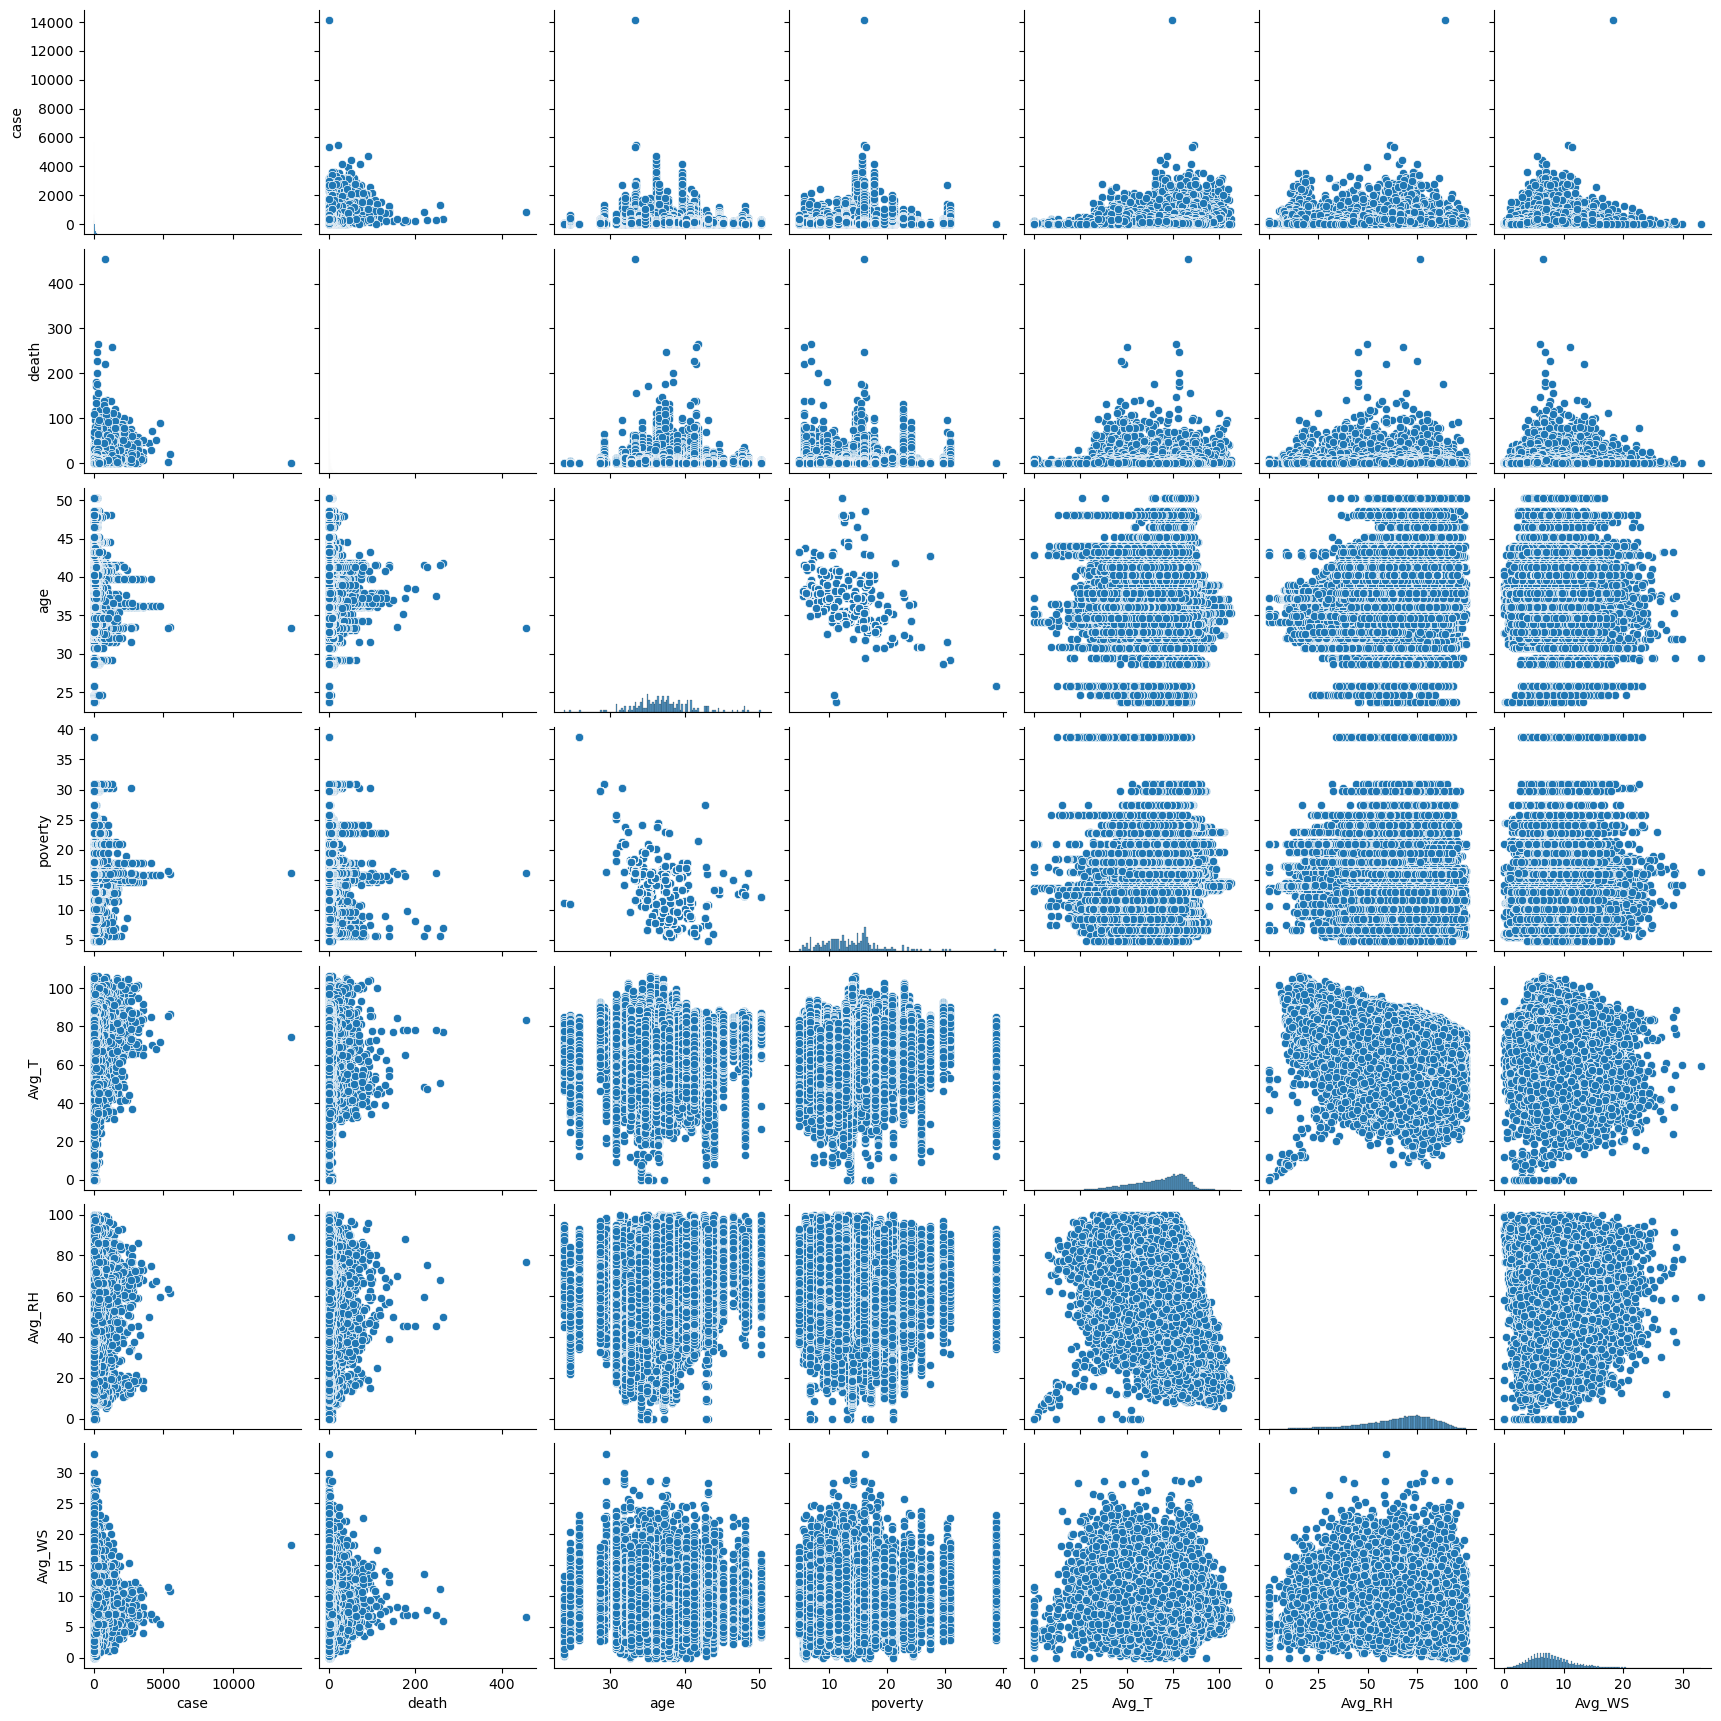

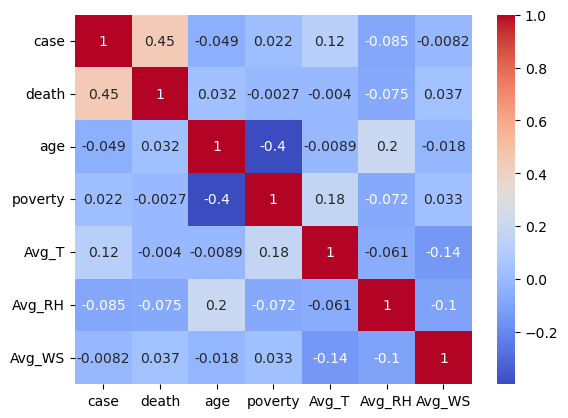

In [4]:
# Correlation Pairing Plot
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot for a subset of variables
sns.pairplot(data[['case', 'death', 'age', 'poverty', 'Avg_T','Avg_RH','Avg_WS']])
plt.show()

# Correlation heatmap
correlation_matrix = data[['case', 'death', 'age', 'poverty', 'Avg_T','Avg_RH','Avg_WS']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Exploratory Spatiotemporal Data Analysis (ESTDA)

In [5]:
# Delete data entries with FIPS '48201'
# Wrong county
data = data[data['fips'] != 48201]

# View
data

rank   fips        lon        lat       date    t  case  death  \
0        57   1073 -86.890254  33.563058 2020-03-01    1     0      0   
1        57   1073 -86.890254  33.563058 2020-03-02    2     0      0   
2        57   1073 -86.890254  33.563058 2020-03-03    3     0      0   
3        57   1073 -86.890254  33.563058 2020-03-04    4     0      0   
4        57   1073 -86.890254  33.563058 2020-03-05    5     0      0   
...     ...    ...        ...        ...        ...  ...   ...    ...   
49980   118  55133 -88.300653  43.019097 2020-10-27  241   319      7   
49981   118  55133 -88.300653  43.019097 2020-10-28  242   287      1   
49982   118  55133 -88.300653  43.019097 2020-10-29  243   288      2   
49983   118  55133 -88.300653  43.019097 2020-10-30  244   331      3   
49984   118  55133 -88.300653  43.019097 2020-10-31  245   372      0   

          county      state  ...  Min_RH  Max_WS  Avg_WS  Min_WS  Max_P  \
0      Jefferson    Alabama  ...    28.0    20.0     8.0     0.0   29.6   
1      Jefferson    Alabama  ...    67.0    18.0     6.7     0.0   29.4   
2      Jefferson    Alabama  ...    59.0    17.0    10.1     0.0   29.3   
3      Jefferson    Alabama  ...    83.0    15.0     4.4     0.0   29.4   
4      Jefferson    Alabama  ...    80.0    13.0     5.4     0.0   29.5   
...          ...        ...  ...     ...     ...     ...     ...    ...   
49980   Waukesha  Wisconsin  ...    41.0    13.0     7.0     3.0   29.6   
49981   Waukesha  Wisconsin  ...    31.0    16.0     9.8     3.0   29.3   
49982   Waukesha  Wisconsin  ...    52.0    25.0    14.8     7.0   29.3   
49983   Waukesha  Wisconsin  ...    45.0    12.0     5.5     0.0   29.6   
49984   Waukesha  Wisconsin  ...    44.0    25.0    12.3     0.0   29.6   

       Avg_P  Min_P  DailyPrecip  dow  stayathome  
0       29.5   29.4         0.00    1         0.0  
1       29.3   29.2         0.13    2         0.0  
2       29.2   29.1         1.64    3         0.0  
3       29.3   29.3         0.52    4         0.0  
4       29.4   29.3         1.60    5         0.0  
...      ...    ...          ...  ...         ...  
49980   29.5   29.3         0.01    3         0.0  
49981   29.2   29.1         0.00    4         0.0  
49982   29.2   29.1         0.00    5         0.0  
49983   29.5   29.4         0.00    6         0.0  
49984   29.3   29.0         0.00    7         0.0  

[49740 rows x 37 columns]

In [6]:
#Create an empty dictionary to store the DataFrame of each rank group
rank_dataframes = {}

# Traverse
for rank, group in data.groupby('rank'):
     # Get the combination of state, city name and FIPS corresponding to the rank group
     state = group['state'].iloc[0]
     county = group['county'].iloc[0]
     fips = group['fips'].iloc[0]
    
     # Caption
     description = f"{state}, {county} (FIPS: {fips})"
    
     # Store data into a dictionary, using rank as the key
     rank_dataframes[rank] = {'description': description, 'data': group}

# Output dictionary size
print("Number of rank groups:", len(rank_dataframes))


data_focus = pd.DataFrame()

# Extract TOP100 cities
for rank, group in data.groupby('rank'):
     if rank <= 100:
         data_focus = pd.concat([data_focus, group], ignore_index=True)
     else:
         break

# Output new data set
data_focus.info()
data_focus

Number of rank groups: 203
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24255 entries, 0 to 24254
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   rank         24255 non-null  int64         
 1   fips         24255 non-null  int64         
 2   lon          24255 non-null  float64       
 3   lat          24255 non-null  float64       
 4   date         24255 non-null  datetime64[ns]
 5   t            24255 non-null  int64         
 6   case         24255 non-null  int64         
 7   death        24255 non-null  int64         
 8   county       24255 non-null  object        
 9   state        24255 non-null  object        
 10  pop          24255 non-null  int64         
 11  age          24255 non-null  float64       
 12  male         24255 non-null  float64       
 13  white        24255 non-null  float64       
 14  black        24255 non-null  float64       
 15  hisp         24255 non-nul

rank   fips         lon        lat       date    t  case  death  \
0         1   6037 -118.212742  34.369957 2020-03-01    1     0      0   
1         1   6037 -118.212742  34.369957 2020-03-02    2     0      0   
2         1   6037 -118.212742  34.369957 2020-03-03    3     0      0   
3         1   6037 -118.212742  34.369957 2020-03-04    4     6      0   
4         1   6037 -118.212742  34.369957 2020-03-05    5     4      0   
...     ...    ...         ...        ...        ...  ...   ...    ...   
24250   100  11001  -77.034099  38.910787 2020-10-27  241    94      2   
24251   100  11001  -77.034099  38.910787 2020-10-28  242    67      0   
24252   100  11001  -77.034099  38.910787 2020-10-29  243   101      1   
24253   100  11001  -77.034099  38.910787 2020-10-30  244    70      1   
24254   100  11001  -77.034099  38.910787 2020-10-31  245   122      0   

                     county                 state  ...  Min_RH  Max_WS  \
0               Los Angeles            California  ...    40.0    15.0   
1               Los Angeles            California  ...    13.0    29.0   
2               Los Angeles            California  ...    12.0    14.0   
3               Los Angeles            California  ...    34.0    13.0   
4               Los Angeles            California  ...    25.0     9.0   
...                     ...                   ...  ...     ...     ...   
24250  District of Columbia  District of Columbia  ...    65.0     9.0   
24251  District of Columbia  District of Columbia  ...    76.0    13.0   
24252  District of Columbia  District of Columbia  ...    84.0    18.0   
24253  District of Columbia  District of Columbia  ...    62.0    21.0   
24254  District of Columbia  District of Columbia  ...    61.0    15.0   

       Avg_WS  Min_WS  Max_P  Avg_P  Min_P  DailyPrecip  dow  stayathome  
0         9.7     0.0   29.2   29.1   29.1         0.00    1         0.0  
1         8.9     0.0   29.1   29.1   29.0         0.00    2         0.0  
2         6.3     0.0   29.2   29.1   29.1         0.00    3         0.0  
3         4.9     0.0   29.3   29.3   29.2         0.00    4         0.0  
4         3.7     0.0   29.3   29.3   29.2         0.00    5         0.0  
...       ...     ...    ...    ...    ...          ...  ...         ...  
24250     4.2     0.0   30.2   30.2   30.1         0.00    3         0.0  
24251     7.3     0.0   30.1   30.0   29.9         0.00    4         0.0  
24252    10.6     6.0   29.9   29.6   29.4         0.62    5         0.0  
24253    13.7     6.0   30.3   29.9   29.6         1.94    6         0.0  
24254     8.2     3.0   30.6   30.4   30.3         0.01    7         0.0  

[24255 rows x 37 columns]

In [7]:
import pandas as pd
import geopandas as gpd
import folium
from folium.plugins import HeatMap

# Convert 'fips', 'county', and 'state' to categorical data types
categorical_columns = ['fips', 'county', 'state']
data[categorical_columns] = data[categorical_columns].astype('category')

# Ensure there are no null values in the 'lon' and 'lat' columns
data.dropna(subset=['lon', 'lat'], inplace=True)

# Generate a GeoDataFrame for spatial analysis
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.lon, data.lat))

# Plot a simple heatmap using Folium
# Calculate mean coordinates for the initial map focus
mean_lat = data['lat'].mean()
mean_lon = data['lon'].mean()

# Create a folium map centered around the mean coordinates
m = folium.Map(location=[mean_lat, mean_lon], zoom_start=6)

# Create a heatmap layer and add it to the map
heatmap_data = gdf[['lat', 'lon', 'case']].copy()
heatmap_data['count'] = 1  # We just need any numeric value for the HeatMap
HeatMap(data=heatmap_data[['lat', 'lon', 'count']].values.tolist(), radius=10, max_zoom=13).add_to(m)

# Add a heat map layer for COVID-19 cases
heatmap_data = gdf[['lat', 'lon', 'case']].dropna()
heat_map = HeatMap(
    data=heatmap_data[['lat', 'lon', 'case']].values.tolist(),
    radius=10,
    max_zoom=13,
    min_opacity=0.8,
    blur=15
)
m.add_child(heat_map)

# Add a title to the map
title_html = '''
             <h3 align="center" style="font-size:20px"><b>COVID-19 Case Heatmap</b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))

# Display the map
m.save('COVID-19_Case_Heatmap.html')
m

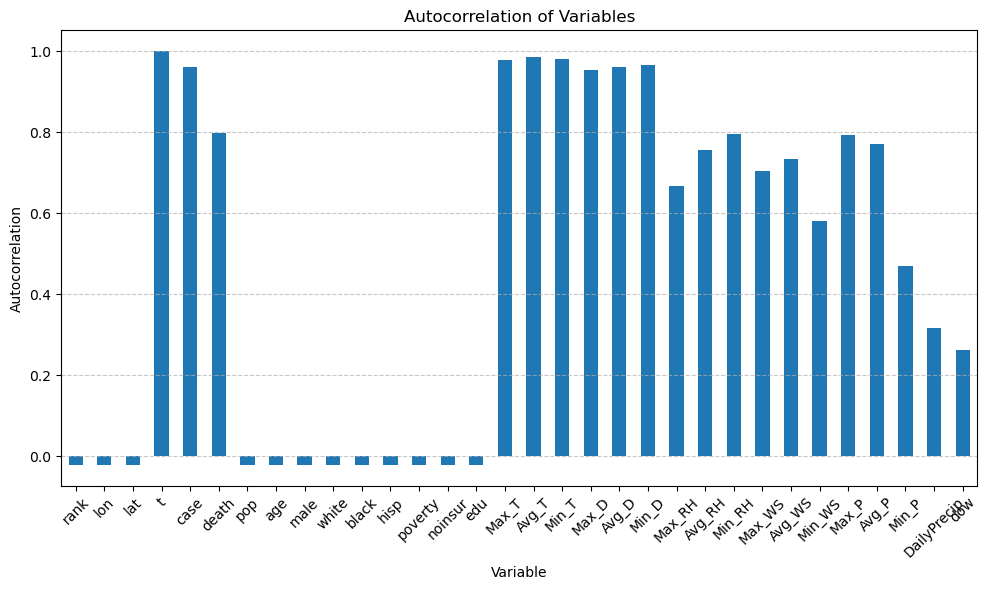

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Select numeric columns including 'date'
numeric_data = data.select_dtypes(include=['float64', 'int64', 'datetime64'])

# Set 'date' as the index
numeric_data.set_index('date', inplace=True)

# Exclude non-numeric columns before resampling
numeric_data = numeric_data.dropna(axis=1)

# Calculate the autocorrelation coefficient of each variable
autocorr_data = numeric_data.resample('D').mean().apply(lambda x: x.autocorr())

# Draw autocorrelation coefficient graph
plt.figure(figsize=(10, 6))
autocorr_data.plot(kind='bar')
plt.title('Autocorrelation of Variables')
plt.xlabel('Variable')
plt.ylabel('Autocorrelation')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\0\AppData\Local\Temp\ipykernel_29600\2363166132.py:8: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=data['lon'], y=data['lat'], cmap='Reds', shade=True, shade_lowest=False)
C:\Users\0\AppData\Local\Temp\ipykernel_29600\2363166132.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=data['lon'], y=data['lat'], cmap='Reds', shade=True, shade_lowest=False)


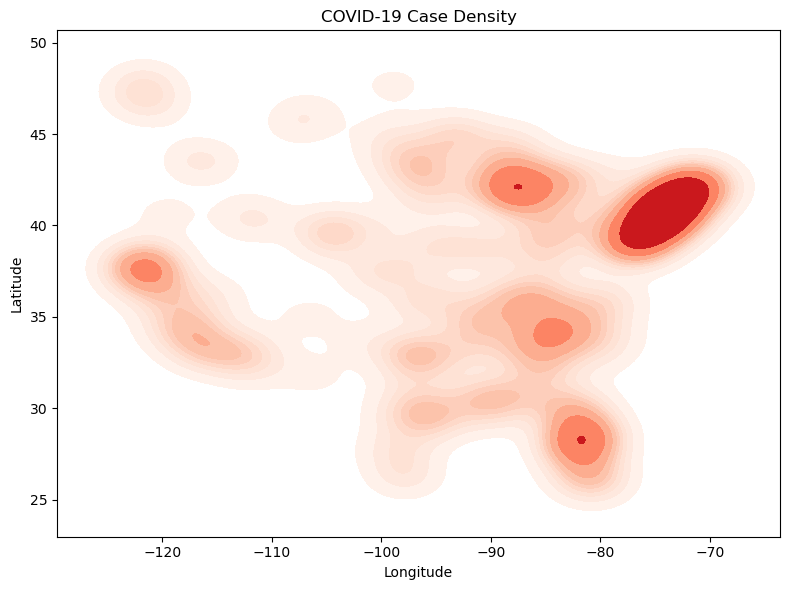

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

#Set graphic size
plt.figure(figsize=(8, 6))

#Map COVID-19 case density
sns.kdeplot(x=data['lon'], y=data['lat'], cmap='Reds', shade=True, shade_lowest=False)
plt.title('COVID-19 Case Density')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.tight_layout()
plt.show()

In [10]:
# Spatial autocorrelation
# Significant positive spatial correlation
from pysal.lib import weights
from pysal.explore import esda
import geopandas as gpd
from shapely.geometry import Point

# Generate a GeoDataFrame for spatial analysis
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.lon, data.lat))

# Extract latitude, longitude and case data
locations = gdf[['lon', 'lat']]
cases = data['case']

# Create a spatial weight matrix
w = weights.KNN.from_dataframe(gdf, k=5)

# Moran's I for calculating COVID-19 cases
moran = esda.Moran(cases, w)

# Print Moran's I statistic and p-value
print("Moran's I Statistic:", moran.I)
print("P-Value:", moran.p_sim)

C:\Users\0\anaconda3\envs\envGEOG0051\Lib\site-packages\spaghetti\network.py:42: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(dep_msg, FutureWarning, stacklevel=1)
C:\Users\0\anaconda3\envs\envGEOG0051\Lib\site-packages\libpysal\weights\weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 203 disconnected components.
  warnings.warn(message)


Moran's I Statistic: 0.6738169103573486
P-Value: 0.001


C:\Users\0\AppData\Local\Temp\ipykernel_29600\1022538284.py:6: FutureWarning: The provided callable <function sum at 0x0000021A24C1E020> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_subset_data = subset_data.pivot_table(index='date', columns='fips', values='case', aggfunc=np.sum).fillna(0)


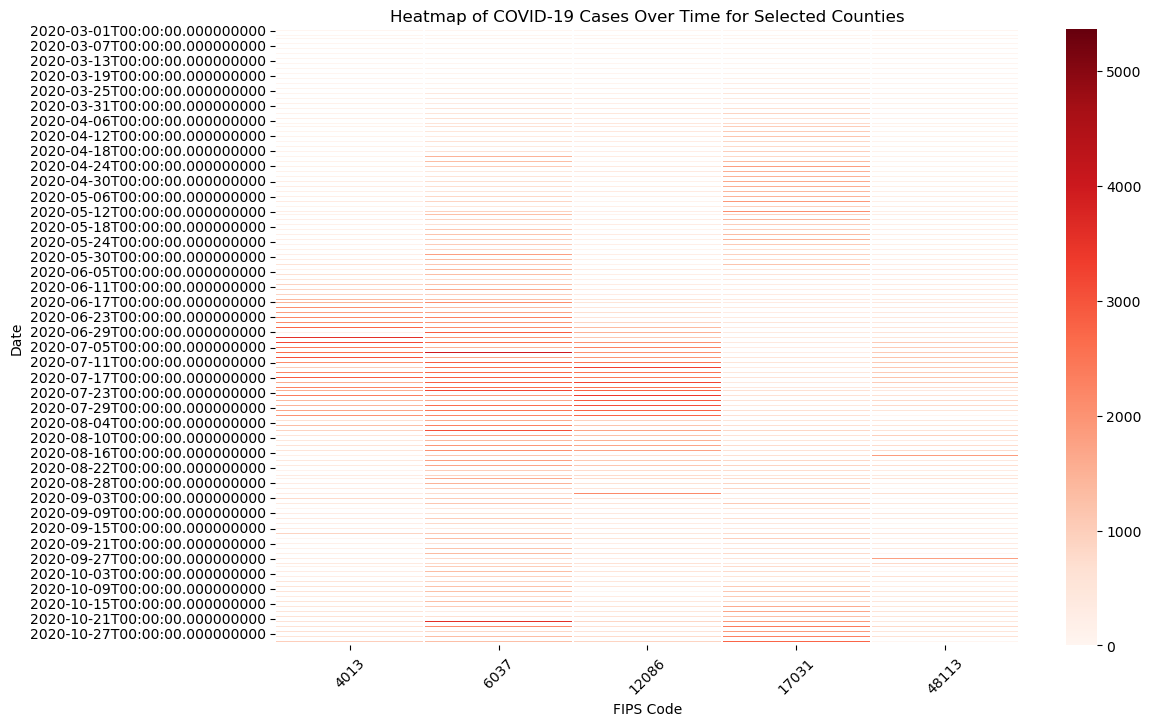

In [11]:
import numpy as np

subset_fips = data_focus['fips'].unique()[:5]  # Select the first 5 unique fips codes as a subset
subset_data = data_focus[data_focus['fips'].isin(subset_fips)]

pivot_subset_data = subset_data.pivot_table(index='date', columns='fips', values='case', aggfunc=np.sum).fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_subset_data, cmap='Reds', linewidths=0.1)
plt.title('Heatmap of COVID-19 Cases Over Time for Selected Counties')
plt.xlabel('FIPS Code')
plt.ylabel('Date')
plt.xticks(rotation=45)
plt.show()

C:\Users\0\AppData\Local\Temp\ipykernel_29600\1862977689.py:12: FutureWarning: The provided callable <function sum at 0x0000021A24C1E020> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_subset_data_for_clustering = subset_data_for_clustering.pivot_table(index='fips', columns='date', values=key_variable, aggfunc=np.sum).fillna(0)
C:\Users\0\anaconda3\envs\envGEOG0051\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\0\anaconda3\envs\envGEOG0051\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envi

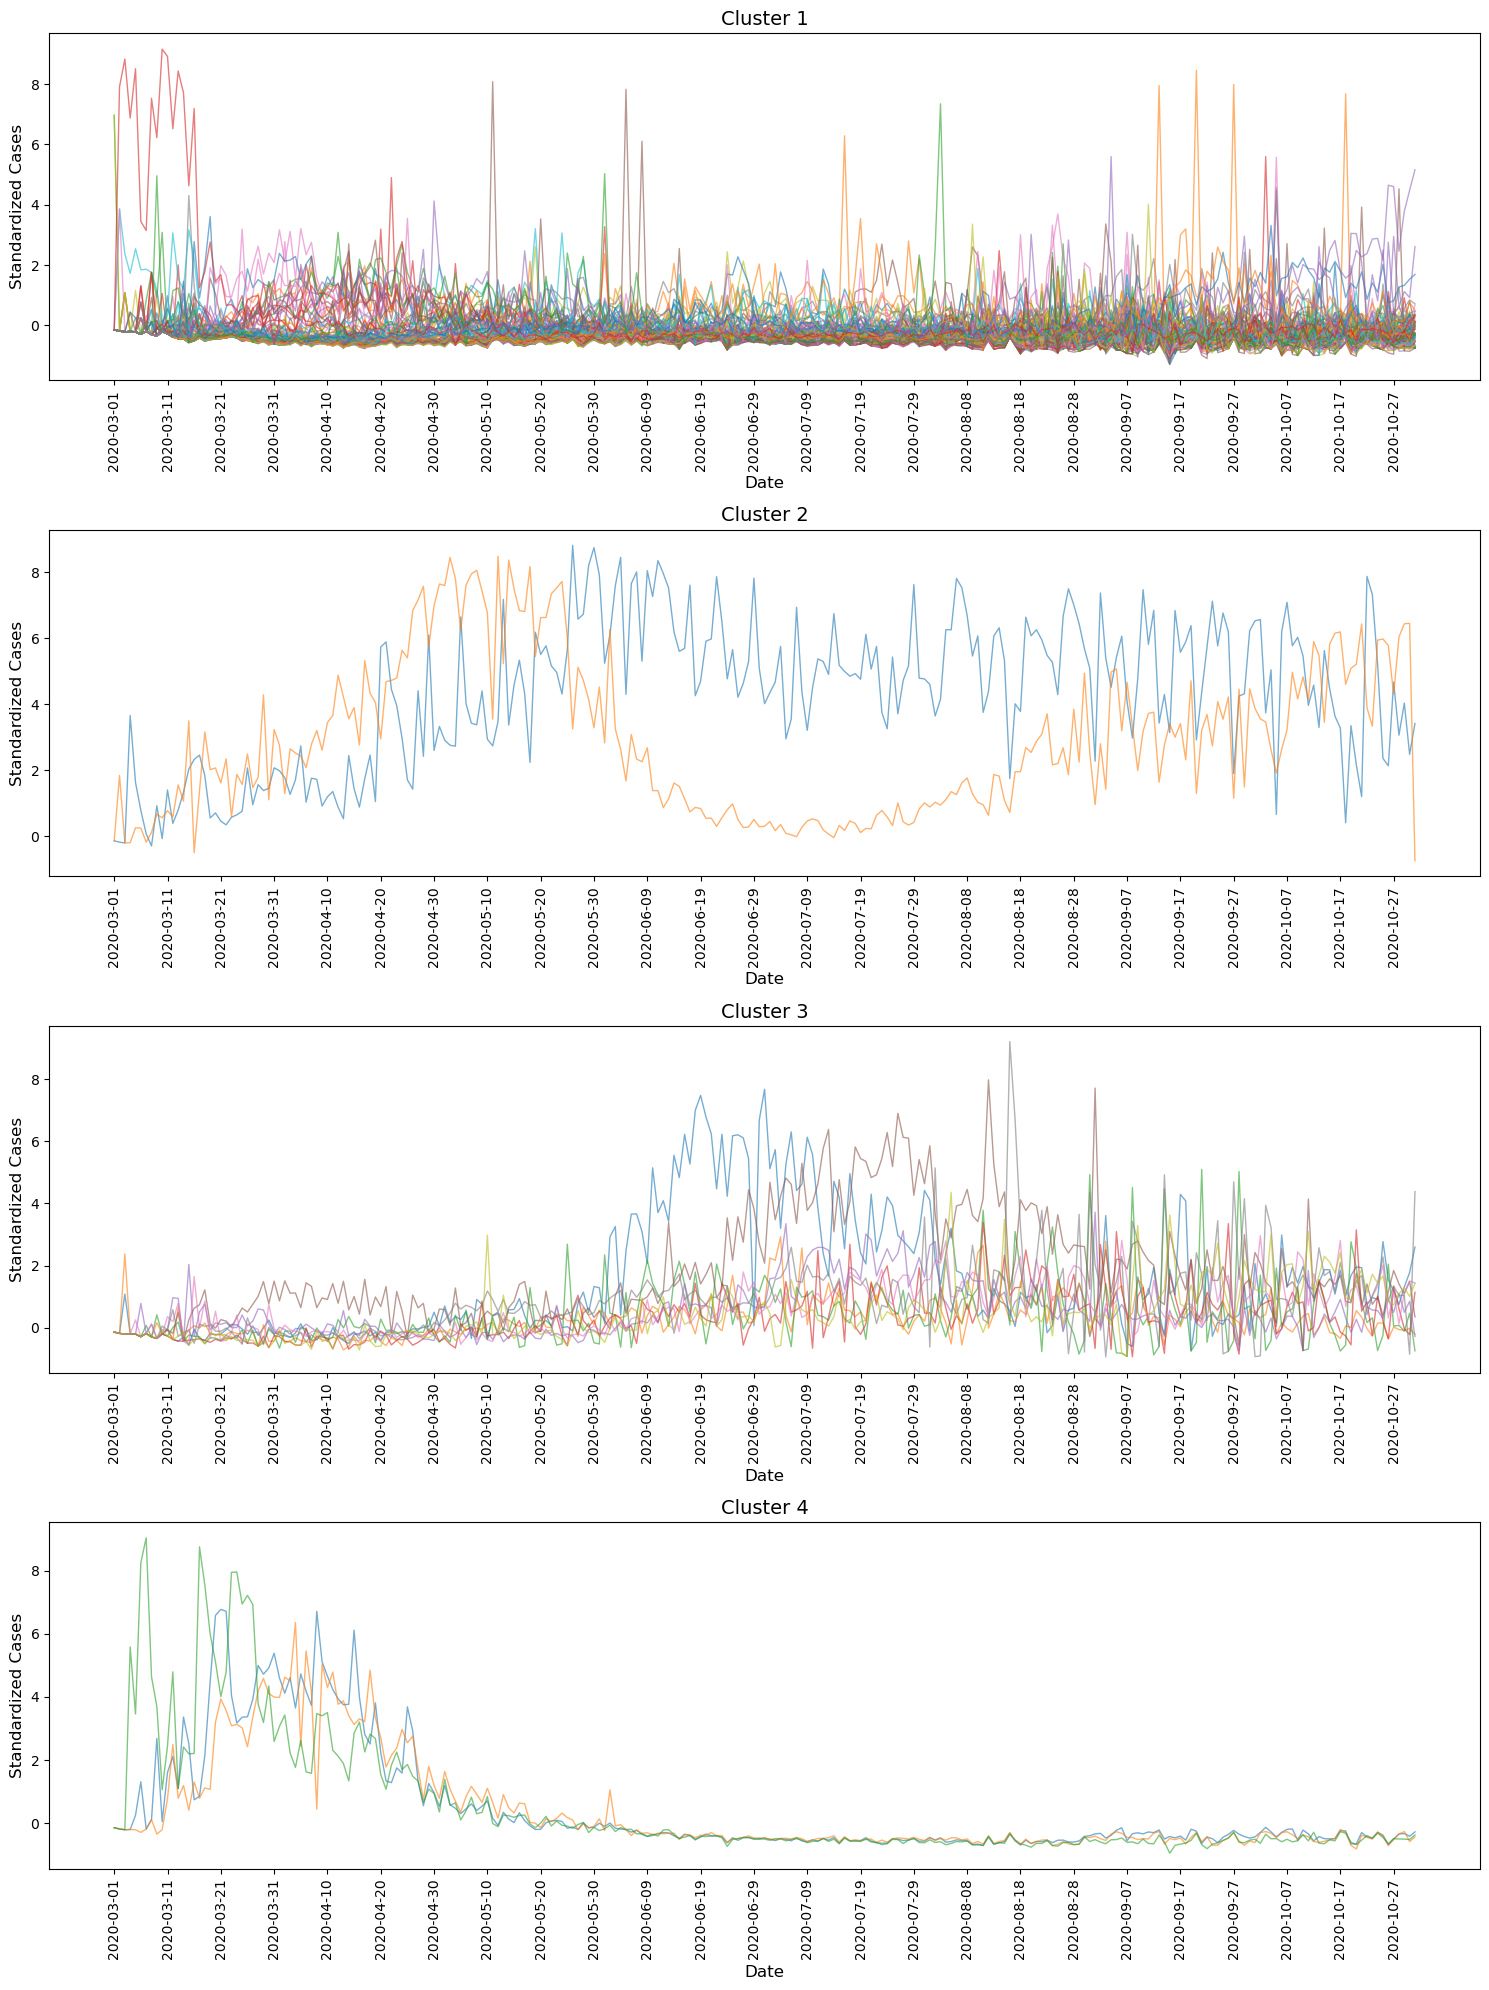

Counties in Cluster 1: Bexar, San Diego, Palm Beach, Salt Lake, El Paso, Hillsborough, Orange, Milwaukee, Philadelphia, Wayne, Shelby, Hennepin, Hidalgo, Duval, Davidson, Mecklenburg, Kern, Franklin, Fulton, Prince George's, Gwinnett, Middlesex, Travis, Fresno, St. Louis, Utah, Suffolk, Pima, King, Marion, Oakland, Sacramento, Montgomery, Pinellas, Bergen, Essex, Jefferson, Santa Clara, DuPage, Oklahoma, Cameron, Cobb, Fairfield, Fairfax, Alameda, Hudson, Lee, Douglas, Providence, Polk, DeKalb, Tulsa, San Joaquin, Lake, Wake, Cuyahoga, Nueces, Passaic, Baltimore city, Union, Macomb, Will, Denver, Lubbock, Contra Costa, Hamilton, Stanislaus, Collin, Hartford, Rockland, Kane, Greenville, Baltimore, Tulare, Fort Bend, Richland, Charleston, New Haven, Ada, District of Columbia
Counties in Cluster 2: Los Angeles, Cook
Counties in Cluster 3: Miami-Dade, Maricopa, Dallas, Broward, Clark, Riverside, Tarrant, San Bernardino, Orange
Counties in Cluster 4: Nassau, Suffolk, Westchester


In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select key variables
key_variable = 'case'

# Select the counties to be clustered
subset_fips_for_clustering = data_focus['fips'].unique()[:]
subset_data_for_clustering = data_focus[data_focus['fips'].isin(subset_fips_for_clustering)]

#Create a pivot table
pivot_subset_data_for_clustering = subset_data_for_clustering.pivot_table(index='fips', columns='date', values=key_variable, aggfunc=np.sum).fillna(0)

# Standardized data
scaler_for_clustering = StandardScaler()
scaled_pivot_subset_data = scaler_for_clustering.fit_transform(pivot_subset_data_for_clustering)

# Use K-means clustering algorithm for clustering
kmeans_for_clustering = KMeans(n_clusters=4, random_state=33) # Assume clustering into 4 clusters
cluster_labels = kmeans_for_clustering.fit_predict(scaled_pivot_subset_data)

# Draw clustering results
fig, axs = plt.subplots(4, 1, figsize=(15, 20))

for cluster in range(4):
     cluster_time_series = scaled_pivot_subset_data[cluster_labels == cluster]
     ax = axs[cluster]

     for ts in cluster_time_series:
         ax.plot(ts, linewidth=1, alpha=0.6)

     ax.set_title(f'Cluster {cluster + 1}', fontsize=14)

     xtick_locations = range(0, len(pivot_subset_data_for_clustering.columns), 10) # One date every 10 days
     xtick_labels = [pivot_subset_data_for_clustering.columns[loc].strftime('%Y-%m-%d') for loc in xtick_locations]
     ax.set_xticks(xtick_locations)
     ax.set_xticklabels(xtick_labels, rotation=90)

     ax.set_xlabel('Date', fontsize=12)
     ax.set_ylabel('Standardized Cases', fontsize=12)

plt.tight_layout()
plt.show()

# Output the counties included in each class
for cluster in range(4):
     counties_in_cluster = subset_data_for_clustering[subset_data_for_clustering['fips'].isin(pivot_subset_data_for_clustering.index[cluster_labels == cluster])]['county'].unique()
     print(f"Counties in Cluster {cluster + 1}: {', '.join(counties_in_cluster)}")

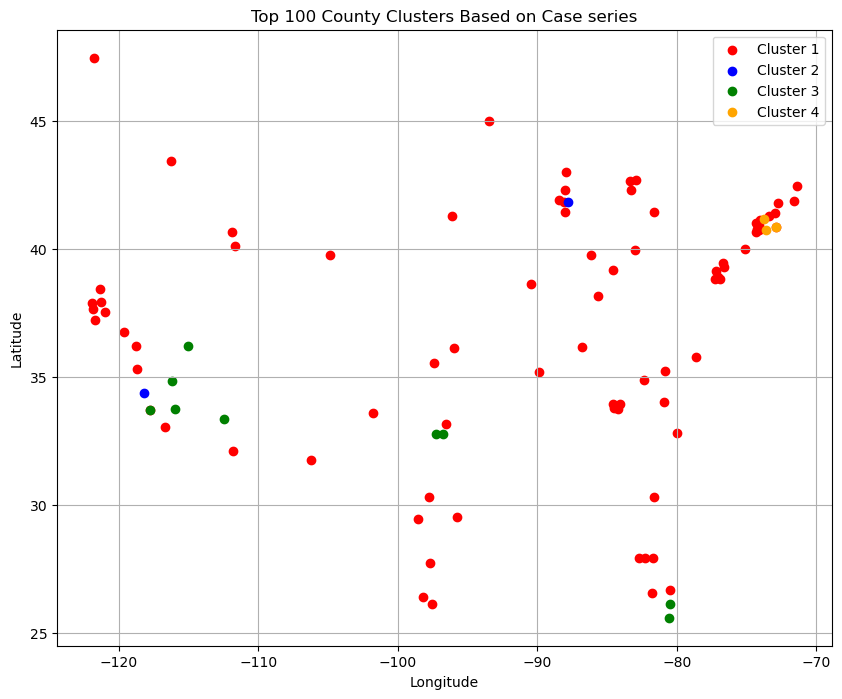

In [13]:
import matplotlib.pyplot as plt

#define color
cluster_colors = ['red', 'blue', 'green', 'orange']

#Create chart
plt.figure(figsize=(10, 8))

# legend
legend_handles = []

# Traverse each
for cluster in range(4):
     # Get the counties belonging to the current cluster
     counties_in_cluster = subset_data_for_clustering[subset_data_for_clustering['fips'].isin(pivot_subset_data_for_clustering.index[cluster_labels == cluster])]['county'].unique()
    
     # Traverse each county in the current cluster
     for county in counties_in_cluster:
         # Get the longitude and latitude of the county
         county_data = data_focus[data_focus['county'] == county]
         lat = county_data['lat'].iloc[0]
         lon = county_data['lon'].iloc[0]
        
         # Draw a scatter plot
         plt.scatter(lon, lat, color=cluster_colors[cluster], label=f'Cluster {cluster+1}' if cluster not in legend_handles else "")
         if cluster not in legend_handles:
             legend_handles.append(cluster)

#Add legend and title
plt.legend()
plt.title('Top 100 County Clusters Based on Case series')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# show chart
plt.grid(True)
plt.show()

C:\Users\0\anaconda3\envs\envGEOG0051\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\0\AppData\Local\Temp\ipykernel_29600\3028049011.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cluster['cluster'] = cluster_labels
C:\Users\0\AppData\Local\Temp\ipykernel_29600\3028049011.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Avg_T', y='Avg_RH', data=cluster_data, label=f'Cluster {cluster_label}', palette='viridis')
C:\Users\0\AppData\Local\Temp\ipykernel_29600\3028049011.py:28:

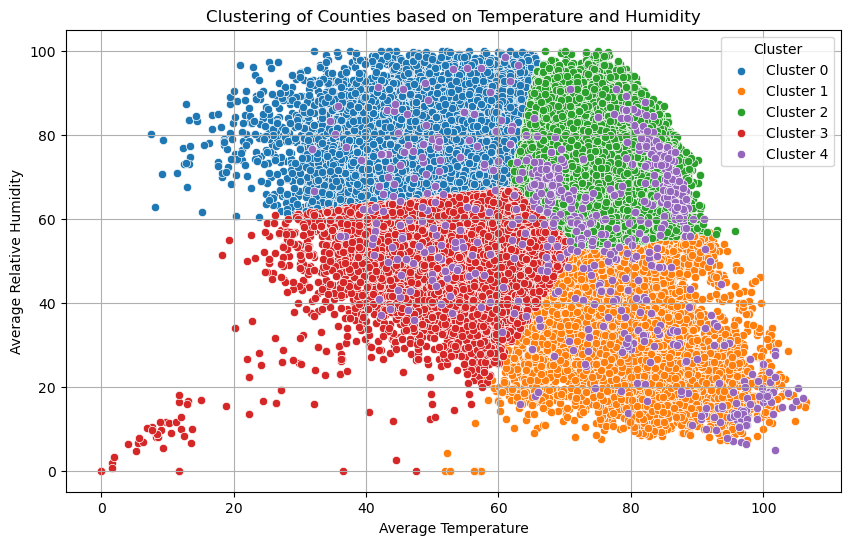

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select variables
variables = ['case', 'Avg_T', 'Avg_RH'] # Assume that the number of cases and some meteorological conditions are selected

# Prepare data set
data_cluster = data[variables]

# Group and normalize data by county
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_cluster.dropna())

#Select the number of clusters
n_clusters = 5 # Assume that the number of selected clusters is 5

# Use K-means clustering algorithm for clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add clustering labels to the data
data_cluster['cluster'] = cluster_labels

# Draw clustering images
plt.figure(figsize=(10, 6))
for cluster_label in range(n_clusters):
     cluster_data = data_cluster[data_cluster['cluster'] == cluster_label]
     sns.scatterplot(x='Avg_T', y='Avg_RH', data=cluster_data, label=f'Cluster {cluster_label}', palette='viridis')
plt.title('Clustering of Counties based on Temperature and Humidity')
plt.xlabel('Average Temperature')
plt.ylabel('Average Relative Humidity')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


C:\Users\0\anaconda3\envs\envGEOG0051\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\0\anaconda3\envs\envGEOG0051\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Counties in Cluster 0: [ 1073  6001  6013  6059  6067  6073  6085 13067 13089 13121 13135 17043
 17089 17097 17197 18097 19153 21111 26099 26125 27053 29189 31055 37119
 37183 39035 39049 39061 40109 40143 45045 45079 47037 47157 55079]
Counties in Cluster 1: [ 4013  4019  6019  6029  6065  6071  6077  6099  6107  8031 16001 32003
 48141 48303 49035 49049]
Counties in Cluster 2: [ 9001  9003  9009 11001 24005 24031 24033 24510 25009 25017 25025 26163
 34003 34013 34017 34023 34031 34039 36059 36087 36103 36119 42101 44007
 51059 53033]
Counties in Cluster 3: [12011 12031 12057 12071 12086 12095 12099 12103 12105 22051 45019 48029
 48061 48085 48113 48157 48215 48355 48439 48453]
Counties in Cluster 4: [ 6037 17031]


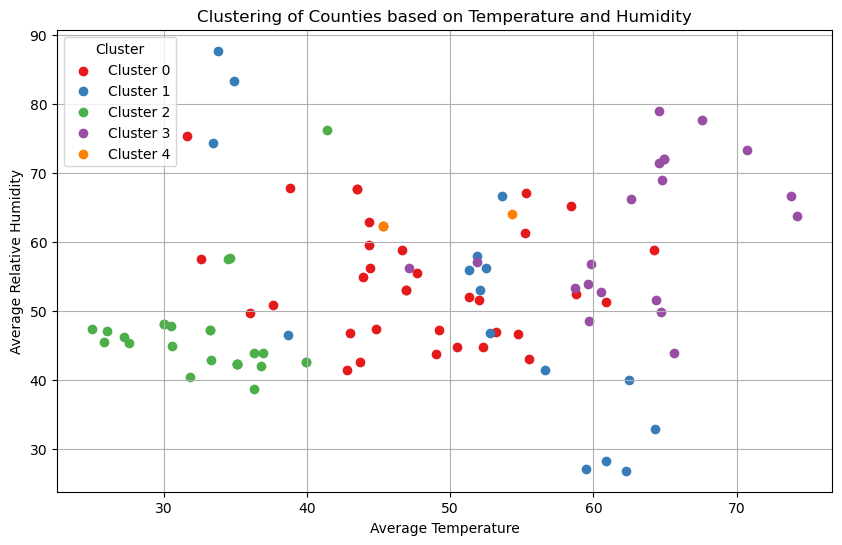

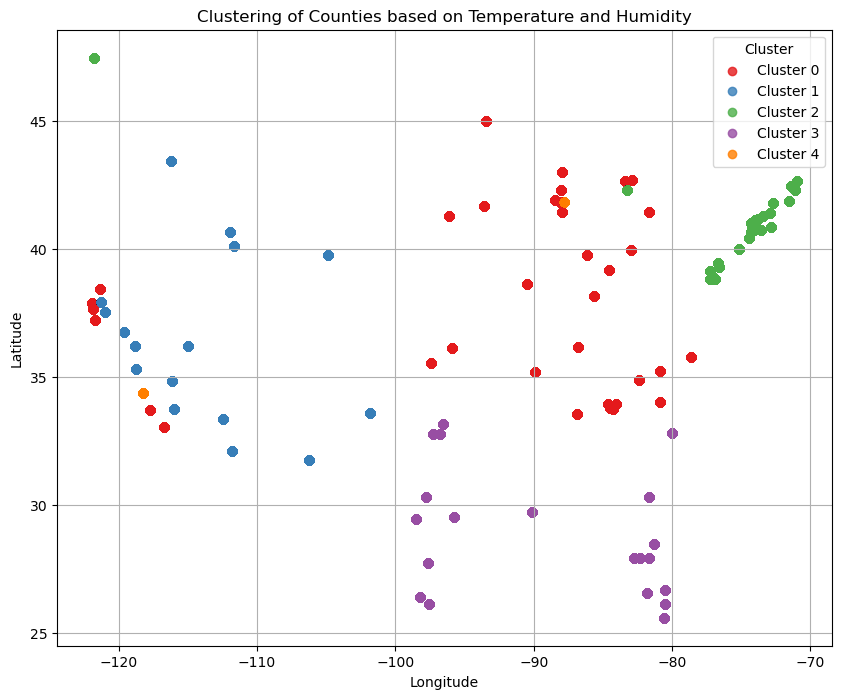

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Select variables
variables = ['case', 'Avg_T', 'Avg_RH'] # Select the number of cases, average temperature and average relative humidity as variables

# data set
data_cluster = data_focus.groupby('fips')[variables].apply(lambda x: x.values.tolist()).reset_index()
data_cluster.columns = ['fips', 'features']

#Convert to feature vector
data_cluster['features'] = data_cluster['features'].apply(lambda x: np.array(x).flatten())

# Standardized data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(np.vstack(data_cluster['features']))

# Number of clusters
n_clusters = 5

# Use K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# Cluster labels
data_cluster['cluster'] = cluster_labels

# Output County
for cluster_label in range(n_clusters):
     counties_in_cluster = data_cluster[data_cluster['cluster'] == cluster_label]['fips'].unique()
     print(f"Counties in Cluster {cluster_label}: {counties_in_cluster}")


palette = sns.color_palette('Set1', n_clusters)

# draw
plt.figure(figsize=(10, 6))
for cluster_label in range(n_clusters):
     cluster_data = data_cluster[data_cluster['cluster'] == cluster_label]
     plt.scatter(cluster_data['features'].apply(lambda x: x[1]), cluster_data['features'].apply(lambda x: x[2]), label=f'Cluster {cluster_label}', alpha=1, c=[palette[cluster_label]])
plt.title('Clustering of Counties based on Temperature and Humidity')
plt.xlabel('Average Temperature')
plt.ylabel('Average Relative Humidity')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()# Get the latitude and longitude based on the FIPS link raw data
data_cluster = data_cluster.merge(data_focus[['fips', 'lon', 'lat']], on='fips', how='left')

# draw
plt.figure(figsize=(10, 8))
for cluster_label in range(n_clusters):
     cluster_data = data_cluster[data_cluster['cluster'] == cluster_label]
     plt.scatter(cluster_data['lon'], cluster_data['lat'], label=f'Cluster {cluster_label}', alpha=0.8, c=[palette[cluster_label]])
plt.title('Clustering of Counties based on Temperature and Humidity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Prediction Model

## Timing Model

In [ ]:
data_focus.info()
data_focus

In [ ]:
import pandas as pd

# Select data for San Diego
san_diego_data = data_focus[data_focus['county'].str.contains('San Diego')]

# Prepare the data required for the time series prediction model, including all average meteorological conditions
features = ['Avg_T', 'Avg_RH', 'Avg_D', 'Avg_WS', 'Avg_P', 'DailyPrecip']
time_series_data = san_diego_data.set_index('date')[features + ['case']]

# Split the data set into training set and test set
train_size = int(len(time_series_data) * 0.8)
train_data, test_data = time_series_data[:train_size], time_series_data[train_size:]

# Output the information of the data set
print("Training time series data set:")
print(time_series_data.head())

print("\nTraining set size:", len(train_data))
print("Test set size:", len(test_data))

In [ ]:
# Data for alternative cities
denver_data = data_focus[data_focus['county'].str.contains('Denver')]
los_angeles_data = data_focus[data_focus['county'].str.contains('Los Angeles')]

print(los_angeles_data.head())
print(san_diego_data.head())
print(denver_data.head())

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import itertools
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

# Meteorological factors
features = ['Avg_T', 'Avg_RH', 'Avg_D', 'Avg_WS', 'Avg_P', 'DailyPrecip']

# Time frequency is daily
time_series_data = time_series_data.asfreq('D')

# Split the data set into training set and test set
train_size = int(len(time_series_data) * 0.8)
train_data, test_data = time_series_data[:train_size], time_series_data[train_size:]

# Parameter range
p_values = range(0, 5) # AR order
d_values = range(0, 5) # Difference order
q_values = range(0, 5) # MA order

best_rmse = float('inf')
best_params = None
best_predictions = None

# Use grid search to find the best combination of parameters
for p, d, q in itertools.product(p_values, d_values, q_values):
     try:
         # Build ARIMA model
         model = ARIMA(train_data['case'], exog=train_data[features], order=(p, d, q))
        
         # fitting
         model_fit = model.fit()
        
         # Evaluate the model using the validation set
         predictions = model_fit.forecast(len(test_data), exog=test_data[features])
         rmse = sqrt(mean_squared_error(test_data['case'], predictions))
        
         # Update the best parameter combination
         if rmse < best_rmse:
             best_rmse = rmse
             best_params = (p, d, q)
             best_predictions = predictions
     except:
         continue

print("Best parameter combination:", best_params)
print("RMSE under the best parameter combination:", best_rmse)

# draw
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['case'], label='Actual')
plt.plot(test_data.index, best_predictions, color='red', label='Predicted')
plt.title('ARIMA Model Prediction with Best Parameters')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
plt.show()

In [ ]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Parameter range
p_values = range(0, 3) # AR order
d_values = range(0, 2) # Difference order
q_values = range(0, 3) # MA order
P_values = range(0, 2) # Seasonal AR order
D_values = range(0, 2) # Seasonal difference order
Q_values = range(0, 2) # Seasonal MA order
s_values = [7] # Seasonal cycle length

best_rmse = float('inf')
best_params = None
best_predictions = None

# Grid search
for p, d, q, P, D, Q, s in itertools.product(p_values, d_values, q_values, P_values, D_values, Q_values, s_values):
     try:
         # Build SARIMA model
         model = SARIMAX(train_data['case'], exog=train_data[features], order=(p, d, q), seasonal_order=(P, D, Q, s))
        
         # fitting
         model_fit = model.fit()
        
         # verify
         predictions = model_fit.forecast(len(test_data), exog=test_data[features])
         rmse = sqrt(mean_squared_error(test_data['case'], predictions))
        
         # Update the best parameter combination
         if rmse < best_rmse:
             best_rmse = rmse
             best_params = (p, d, q, P, D, Q, s)
             best_predictions = predictions
     except:
         continue

print("Best parameter combination:", best_params)
print("RMSE under the best parameter combination:", best_rmse)

# draw
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['case'], label='Actual')
plt.plot(test_data.index, best_predictions, color='red', label='Predicted')
plt.title('SARIMA Model Prediction with Best Parameters')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
plt.show()

## Machine learning model

In [16]:
data_focus

rank   fips         lon        lat       date    t  case  death  \
0         1   6037 -118.212742  34.369957 2020-03-01    1     0      0   
1         1   6037 -118.212742  34.369957 2020-03-02    2     0      0   
2         1   6037 -118.212742  34.369957 2020-03-03    3     0      0   
3         1   6037 -118.212742  34.369957 2020-03-04    4     6      0   
4         1   6037 -118.212742  34.369957 2020-03-05    5     4      0   
...     ...    ...         ...        ...        ...  ...   ...    ...   
24250   100  11001  -77.034099  38.910787 2020-10-27  241    94      2   
24251   100  11001  -77.034099  38.910787 2020-10-28  242    67      0   
24252   100  11001  -77.034099  38.910787 2020-10-29  243   101      1   
24253   100  11001  -77.034099  38.910787 2020-10-30  244    70      1   
24254   100  11001  -77.034099  38.910787 2020-10-31  245   122      0   

                     county                 state  ...  Min_RH  Max_WS  \
0               Los Angeles            California  ...    40.0    15.0   
1               Los Angeles            California  ...    13.0    29.0   
2               Los Angeles            California  ...    12.0    14.0   
3               Los Angeles            California  ...    34.0    13.0   
4               Los Angeles            California  ...    25.0     9.0   
...                     ...                   ...  ...     ...     ...   
24250  District of Columbia  District of Columbia  ...    65.0     9.0   
24251  District of Columbia  District of Columbia  ...    76.0    13.0   
24252  District of Columbia  District of Columbia  ...    84.0    18.0   
24253  District of Columbia  District of Columbia  ...    62.0    21.0   
24254  District of Columbia  District of Columbia  ...    61.0    15.0   

       Avg_WS  Min_WS  Max_P  Avg_P  Min_P  DailyPrecip  dow  stayathome  
0         9.7     0.0   29.2   29.1   29.1         0.00    1         0.0  
1         8.9     0.0   29.1   29.1   29.0         0.00    2         0.0  
2         6.3     0.0   29.2   29.1   29.1         0.00    3         0.0  
3         4.9     0.0   29.3   29.3   29.2         0.00    4         0.0  
4         3.7     0.0   29.3   29.3   29.2         0.00    5         0.0  
...       ...     ...    ...    ...    ...          ...  ...         ...  
24250     4.2     0.0   30.2   30.2   30.1         0.00    3         0.0  
24251     7.3     0.0   30.1   30.0   29.9         0.00    4         0.0  
24252    10.6     6.0   29.9   29.6   29.4         0.62    5         0.0  
24253    13.7     6.0   30.3   29.9   29.6         1.94    6         0.0  
24254     8.2     3.0   30.6   30.4   30.3         0.01    7         0.0  

[24255 rows x 37 columns]

In [17]:
data_cluster

fips                                           features  cluster  \
0       1073  [0.0, 55.5, 43.1, 0.0, 57.6, 88.5, 0.0, 66.5, ...        0   
1       1073  [0.0, 55.5, 43.1, 0.0, 57.6, 88.5, 0.0, 66.5, ...        0   
2       1073  [0.0, 55.5, 43.1, 0.0, 57.6, 88.5, 0.0, 66.5, ...        0   
3       1073  [0.0, 55.5, 43.1, 0.0, 57.6, 88.5, 0.0, 66.5, ...        0   
4       1073  [0.0, 55.5, 43.1, 0.0, 57.6, 88.5, 0.0, 66.5, ...        0   
...      ...                                                ...      ...   
24250  55079  [0.0, 44.4, 56.3, 0.0, 38.3, 63.0, 0.0, 36.9, ...        0   
24251  55079  [0.0, 44.4, 56.3, 0.0, 38.3, 63.0, 0.0, 36.9, ...        0   
24252  55079  [0.0, 44.4, 56.3, 0.0, 38.3, 63.0, 0.0, 36.9, ...        0   
24253  55079  [0.0, 44.4, 56.3, 0.0, 38.3, 63.0, 0.0, 36.9, ...        0   
24254  55079  [0.0, 44.4, 56.3, 0.0, 38.3, 63.0, 0.0, 36.9, ...        0   

             lon        lat  
0     -86.890254  33.563058  
1     -86.890254  33.563058  
2     -86.890254  33.563058  
3     -86.890254  33.563058  
4     -86.890254  33.563058  
...          ...        ...  
24250 -87.964163  43.007742  
24251 -87.964163  43.007742  
24252 -87.964163  43.007742  
24253 -87.964163  43.007742  
24254 -87.964163  43.007742  

[24255 rows x 5 columns]

In [18]:
# Summarize cluster columns with FIPS
cluster_mean_by_fips = data_cluster.groupby('fips')['cluster'].mean()

# Convert the result to DataFrame
cluster_mean_by_fips_df = cluster_mean_by_fips.reset_index()

print(cluster_mean_by_fips_df)


     fips  cluster
0    1073      0.0
1    4013      1.0
2    4019      1.0
3    6001      0.0
4    6013      0.0
..    ...      ...
94  49035      1.0
95  49049      1.0
96  51059      2.0
97  53033      2.0
98  55079      0.0

[99 rows x 2 columns]


In [19]:
# Merge data_focus and cluster_mean_by_fips_df
data_focus_merged = data_focus.merge(cluster_mean_by_fips_df[['fips', 'cluster']], on='fips', how='left')

#Create a new column 'timecluster' and assign a value
data_focus_merged['timecluster'] = data_focus_merged['cluster']

# Delete cluster column
data_focus_merged.drop('cluster', axis=1, inplace=True)

# print results
print(data_focus_merged.head())


   rank  fips         lon        lat       date  t  case  death       county  \
0     1  6037 -118.212742  34.369957 2020-03-01  1     0      0  Los Angeles   
1     1  6037 -118.212742  34.369957 2020-03-02  2     0      0  Los Angeles   
2     1  6037 -118.212742  34.369957 2020-03-03  3     0      0  Los Angeles   
3     1  6037 -118.212742  34.369957 2020-03-04  4     6      0  Los Angeles   
4     1  6037 -118.212742  34.369957 2020-03-05  5     4      0  Los Angeles   

        state  ...  Max_WS  Avg_WS  Min_WS  Max_P  Avg_P  Min_P  DailyPrecip  \
0  California  ...    15.0     9.7     0.0   29.2   29.1   29.1          0.0   
1  California  ...    29.0     8.9     0.0   29.1   29.1   29.0          0.0   
2  California  ...    14.0     6.3     0.0   29.2   29.1   29.1          0.0   
3  California  ...    13.0     4.9     0.0   29.3   29.3   29.2          0.0   
4  California  ...     9.0     3.7     0.0   29.3   29.3   29.2          0.0   

   dow  stayathome  timecluster  
0   

In [20]:
# data4ml is used to build machine learning models
data4ml = pd.DataFrame(columns=data_focus_merged.columns)

# Define the coordinate points of four rectangular ranges and corresponding labels
rectangles = [
     [(-125, 35), (-125, 40), (-120, 40), (-120, 35), 1], # First rectangle West Coast
     [(-90, 40), (-90, 45), (-80, 45), (-80, 40), 2], # Second rectangle Chicago
     [(-80, 40), (-80, 45), (-70, 45), (-70, 40), 3], # The third rectangle East Coast
     [(-90, 25), (-90, 30), (-80, 30), (-80, 25), 4] # Fourth rectangle South Coast
]

# Traverse the data set
for index, row in data_focus_merged.iterrows():
     lon, lat = row['lon'], row['lat']
    
     # Traverse four rectangular ranges
     for rectangle in rectangles:
         if (rectangle[0][0] <= lon <= rectangle[2][0]) and (rectangle[0][1] <= lat <= rectangle[1][1]):
             # If the coordinates are within the current rectangular range, add the row of data to data4ml and add the 'region' column to the record
             row['region'] = rectangle[4]
             data4ml = pd.concat([data4ml, row.to_frame().transpose()])
             break

# Reset index
data4ml.reset_index(drop=True, inplace=True)

# Display the first few rows of data in data4ml
print(data4ml.head())

#Print the number of selected data
print("The number of selected data:", len(data4ml))

  rank   fips       lon        lat                 date  t case death county  \
0    2  17031 -87.82118  41.842959  2020-03-01 00:00:00  1    0     0   Cook   
1    2  17031 -87.82118  41.842959  2020-03-02 00:00:00  2    1     0   Cook   
2    2  17031 -87.82118  41.842959  2020-03-03 00:00:00  3    0     0   Cook   
3    2  17031 -87.82118  41.842959  2020-03-04 00:00:00  4    0     0   Cook   
4    2  17031 -87.82118  41.842959  2020-03-05 00:00:00  5    1     0   Cook   

      state  ... Avg_WS Min_WS Max_P Avg_P Min_P DailyPrecip dow stayathome  \
0  Illinois  ...   12.8    7.0  29.4  29.2  29.1         0.0   1        0.0   
1  Illinois  ...    6.4    3.0  29.1  29.1  29.0         0.0   2        0.0   
2  Illinois  ...   12.6    3.0  29.1  29.0  28.9         0.0   3        0.0   
3  Illinois  ...    7.3    0.0  29.4  29.3  29.1        0.01   4        0.0   
4  Illinois  ...   16.1    5.0  29.4  29.3  29.2        0.02   5        0.0   

  timecluster region  
0         4.0      2 

In [21]:
from sklearn.preprocessing import LabelEncoder
# Delete unused variables
df_ml = data4ml.drop(['rank', 'fips', 'lon', 'lat', 'date'], axis=1)

# Geocoding
labelencoder = LabelEncoder()
df_ml['county_encoded'] = labelencoder.fit_transform(df_ml['county'])
df_ml['state_encoded'] = labelencoder.fit_transform(df_ml['state'])

df_ml = df_ml.drop(['county', 'state'], axis=1)

df_ml

t case death      pop   age   male  white  black   hisp poverty  ...  \
0        1    0     0  5180493  36.6  48.52  14.16  23.56  25.16   14.89  ...   
1        2    1     0  5180493  36.6  48.52  14.16  23.56  25.16   14.89  ...   
2        3    0     0  5180493  36.6  48.52  14.16  23.56  25.16   14.89  ...   
3        4    0     0  5180493  36.6  48.52  14.16  23.56  25.16   14.89  ...   
4        5    1     0  5180493  36.6  48.52  14.16  23.56  25.16   14.89  ...   
...    ...  ...   ...      ...   ...    ...    ...    ...    ...     ...  ...   
10285  241  121     0   857620  40.1  48.21  10.29  13.24  17.61    11.5  ...   
10286  242  122     2   857620  40.1  48.21  10.29  13.24  17.61    11.5  ...   
10287  243  319     0   857620  40.1  48.21  10.29  13.24  17.61    11.5  ...   
10288  244  196     0   857620  40.1  48.21  10.29  13.24  17.61    11.5  ...   
10289  245    0     0   857620  40.1  48.21  10.29  13.24  17.61    11.5  ...   

      Max_P Avg_P Min_P DailyPrecip dow stayathome timecluster region  \
0      29.4  29.2  29.1         0.0   1        0.0         4.0      2   
1      29.1  29.1  29.0         0.0   2        0.0         4.0      2   
2      29.1  29.0  28.9         0.0   3        0.0         4.0      2   
3      29.4  29.3  29.1        0.01   4        0.0         4.0      2   
4      29.4  29.3  29.2        0.02   5        0.0         4.0      2   
...     ...   ...   ...         ...  ..        ...         ...    ...   
10285  30.2  30.1  30.1         0.0   3        0.0         2.0      3   
10286  30.1  30.0  29.9        0.08   4        0.0         2.0      3   
10287  29.9  29.8  29.6        0.21   5        0.0         2.0      3   
10288  30.3  29.8  29.6        1.28   6        0.0         2.0      3   
10289  30.5  30.4  30.3        0.16   7        0.0         2.0      3   

      county_encoded state_encoded  
0                  4             3  
1                  4             3  
2                  4             3  
3                  4             3  
4                  4             3  
...              ...           ...  
10285             20             1  
10286             20             1  
10287             20             1  
10288             20             1  
10289             20             1  

[10290 rows x 34 columns]

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
# Select features 
X = df_ml.drop('case', axis=1)
y = df_ml['case']

# Handling missing values: Replace NaN with the median of the column
X_filled = X.fillna(X.median())

# Standardizing the features: mean=0, variance=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filled)


# Split the standardized data into training and testing sets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'Support Vector Regression': SVR(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Dictionary to store the results
results = {}

# Train and evaluate the models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}

for model_name, metrics in results.items():
    print(f"{model_name} - MSE: {metrics['MSE']:.2f}, R2: {metrics['R2']:.2f}")

Linear Regression - MSE: 43431.24, R2: 0.38
Decision Tree - MSE: 30725.60, R2: 0.56
Random Forest - MSE: 13515.61, R2: 0.81
Support Vector Regression - MSE: 63047.31, R2: 0.10
Gradient Boosting - MSE: 15876.54, R2: 0.77


In [23]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# Coarse search parameter space range
param_dist_coarse = {
     "n_estimators": randint(10, 100), # The range of the number of trees in the random forest
     "max_depth": [None] + list(range(5, 20)), # The maximum depth range of the tree
     "min_samples_split": randint(2, 20), # Minimum sample number range required for re-dividing internal nodes
     "min_samples_leaf": randint(1, 20), # Minimum sample number range of leaf nodes
     "max_features": randint(1, len(X.columns)) # The range of feature numbers considered each time a node is divided
}

#Initialize the random forest regression model
random_forest_coarse = RandomForestRegressor(random_state=42)

# Use random search for rough search
random_search_coarse = RandomizedSearchCV(estimator=random_forest_coarse, param_distributions=param_dist_coarse,
                                           n_iter=5, cv=5, random_state=42)

# Perform a rough search on the training set
random_search_coarse.fit(X_train_scaled, y_train)

# Output the results of rough search
print("Coarse search best parameter combination:", random_search_coarse.best_params_)
print("Coarse search best model score:", random_search_coarse.best_score_)

#Adjust the parameter space range based on the results of the rough search
param_dist_fine = {
     "n_estimators": randint(random_search_coarse.best_params_['n_estimators'] - 20,
                              random_search_coarse.best_params_['n_estimators'] + 20),
     "max_depth": [None] + list(range(random_search_coarse.best_params_['max_depth'] - 3,
                                       random_search_coarse.best_params_['max_depth'] + 3)),
     "min_samples_split": randint(random_search_coarse.best_params_['min_samples_split'] - 3,
                                   random_search_coarse.best_params_['min_samples_split'] + 3),
     "min_samples_leaf": randint(random_search_coarse.best_params_['min_samples_leaf'] - 3,
                                  random_search_coarse.best_params_['min_samples_leaf'] + 3),
     "max_features": randint(random_search_coarse.best_params_['max_features'] - 3,
                             random_search_coarse.best_params_['max_features'] + 3)
}

# Initialize random forest regression model (for fine search)
random_forest_fine = RandomForestRegressor(random_state=42)

# Use random search for refined search
random_search_fine = RandomizedSearchCV(estimator=random_forest_fine, param_distributions=param_dist_fine,
                                         n_iter=5, cv=5, random_state=42)

# Perform a fine search on the training set
random_search_fine.fit(X_train_scaled, y_train)

# Output the results of fine search
print("Fine search best parameter combination:", random_search_fine.best_params_)
print("Fine search best model score:", random_search_fine.best_score_)

# Get the best model for fine search
best_model_fine = random_search_fine.best_estimator_

# Evaluate the best model performance of fine search on the test set
y_pred_best_fine = best_model_fine.predict(X_test_scaled)
mse_best_fine = mean_squared_error(y_test, y_pred_best_fine)
r2_best_fine = r2_score(y_test, y_pred_best_fine)

print(f"Best model (fine search) - MSE: {mse_best_fine:.2f}, R2: {r2_best_fine:.2f}")

Coarse search best parameter combination: {'max_depth': 11, 'max_features': 21, 'min_samples_leaf': 4, 'min_samples_split': 9, 'n_estimators': 33}
Coarse search best model score: 0.7218971245935452
Fine search best parameter combination: {'max_depth': 11, 'max_features': 22, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 35}
Fine search best model score: 0.7330924122494259
Best model (fine search) - MSE: 13276.05, R2: 0.81


Random Forest Regressor - MSE: 13276.05, R2: 0.81


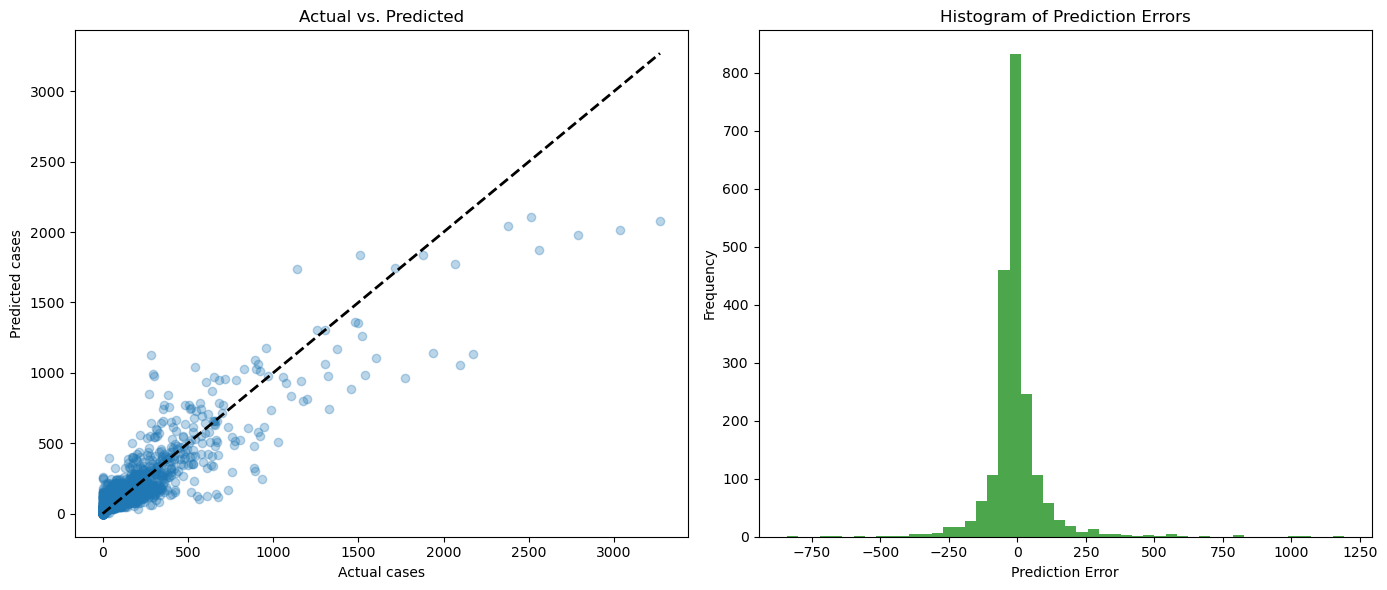

In [24]:
random_forest_model = RandomForestRegressor(n_estimators=35, random_state=42,min_samples_leaf=2,min_samples_split=8,max_features=22,max_depth=11)
random_forest_model.fit(X_train_scaled, y_train)
y_pred_rf = random_forest_model.predict(X_test_scaled)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor - MSE: {mse_rf:.2f}, R2: {r2_rf:.2f}")

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].scatter(y_test, y_pred_rf, alpha=0.3)
axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axs[0].set_title('Actual vs. Predicted')
axs[0].set_xlabel('Actual cases')
axs[0].set_ylabel('Predicted cases')

residuals_rf = y_test - y_pred_rf
axs[1].hist(residuals_rf, bins=50, alpha=0.7, color='green')
axs[1].set_title('Histogram of Prediction Errors')
axs[1].set_xlabel('Prediction Error')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [25]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import randint

# Define the parameter space range of the gradient boosting tree model
param_dist = {
     "n_estimators": randint(10, 100), # The number range of trees
     "learning_rate": [0.001, 0.01, 0.1, 0.2, 0.3], # Learning rate range
     "max_depth": [3, 4, 5, 6, 7, 8, 9], # The maximum depth range of the tree
     "min_samples_split": randint(2, 20), # Minimum sample number range required for re-dividing internal nodes
     "min_samples_leaf": randint(1, 20), # Minimum sample number range of leaf nodes
     "max_features": ['auto', 'sqrt', 'log2'] # The range of feature numbers considered each time a node is divided
}

# Initialize gradient boosting tree regression model
gradient_boosting = GradientBoostingRegressor(random_state=42)

# Use random search for parameter optimization
random_search_gb = RandomizedSearchCV(estimator=gradient_boosting, param_distributions=param_dist,
                                       n_iter=20, cv=5, random_state=42)

# Perform a random search on the training set
random_search_gb.fit(X_train_scaled, y_train)

# Output the best parameter combination
print("Best parameter combination:", random_search_gb.best_params_)

# Output the best model score
print("Best model score:", random_search_gb.best_score_)

# Get the best model
best_model_gb = random_search_gb.best_estimator_

# Evaluate the best model performance on the test set
y_pred_best_gb = best_model_gb.predict(X_test_scaled)
mse_best_gb = mean_squared_error(y_test, y_pred_best_gb)
r2_best_gb = r2_score(y_test, y_pred_best_gb)

print(f"Best model - MSE: {mse_best_gb:.2f}, R2: {r2_best_gb:.2f}")

C:\Users\0\anaconda3\envs\envGEOG0051\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
35 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\0\anaconda3\envs\envGEOG0051\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\0\anaconda3\envs\envGEOG0051\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\0\anaconda3\envs\envGEOG0051\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints

Best parameter combination: {'learning_rate': 0.2, 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 16, 'min_samples_split': 16, 'n_estimators': 81}
Best model score: 0.7799530052991223
Best model - MSE: 13932.50, R2: 0.80


Gradient Boosting Regressor - MSE: 13932.50, R2: 0.80


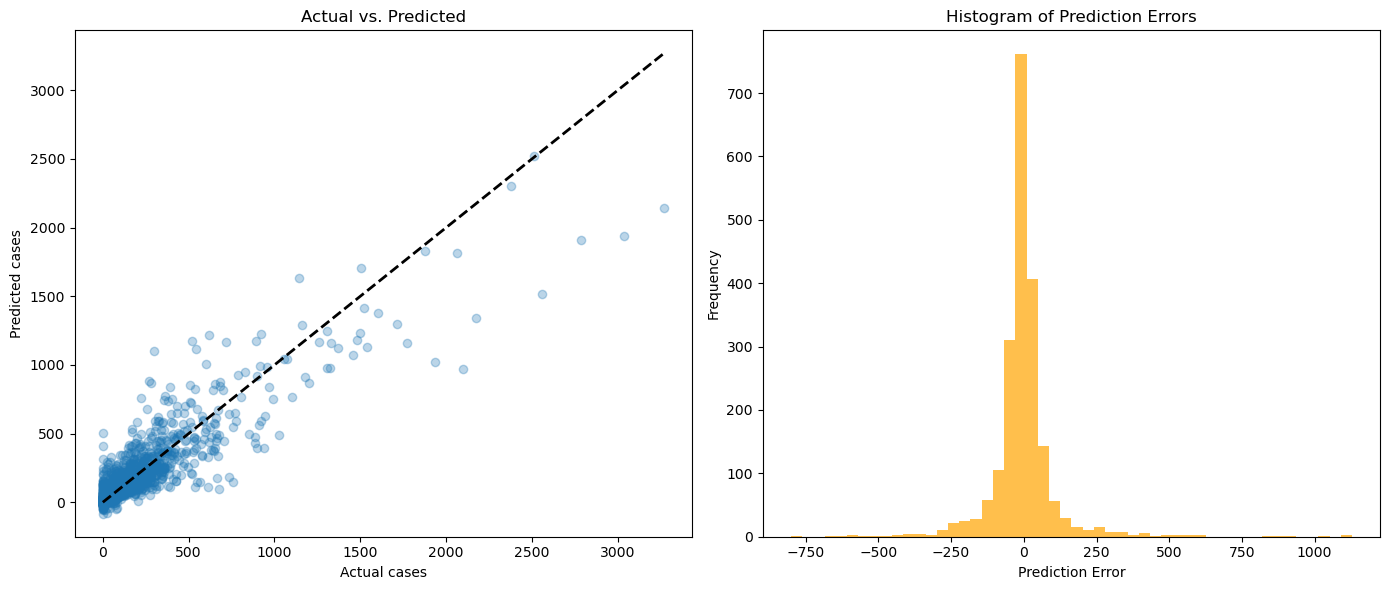

In [26]:
gradient_boosting_model = GradientBoostingRegressor(random_state=42,learning_rate=0.2,max_depth=8,max_features='log2',min_samples_leaf=16,min_samples_split=16,n_estimators=81)
gradient_boosting_model.fit(X_train_scaled, y_train)
y_pred_gb = gradient_boosting_model.predict(X_test_scaled)

mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Regressor - MSE: {mse_gb:.2f}, R2: {r2_gb:.2f}")

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].scatter(y_test, y_pred_gb, alpha=0.3)
axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axs[0].set_title('Actual vs. Predicted')
axs[0].set_xlabel('Actual cases')
axs[0].set_ylabel('Predicted cases')

residuals_gb = y_test - y_pred_gb
axs[1].hist(residuals_gb, bins=50, alpha=0.7, color='orange')
axs[1].set_title('Histogram of Prediction Errors')
axs[1].set_xlabel('Prediction Error')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Support Vector Regression - MSE: 63047.31, R2: 0.10


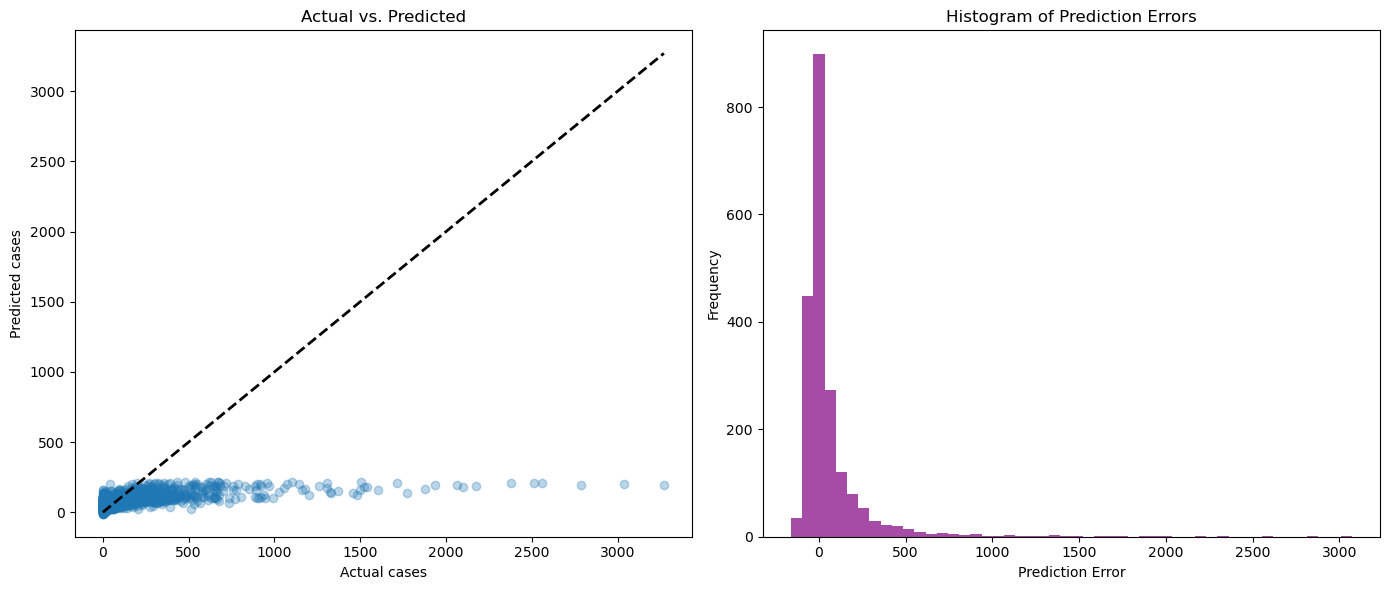

In [27]:
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)

mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"Support Vector Regression - MSE: {mse_svr:.2f}, R2: {r2_svr:.2f}")

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].scatter(y_test, y_pred_svr, alpha=0.3)
axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axs[0].set_title('Actual vs. Predicted')
axs[0].set_xlabel('Actual cases')
axs[0].set_ylabel('Predicted cases')

residuals_svr = y_test - y_pred_svr
axs[1].hist(residuals_svr, bins=50, alpha=0.7, color='purple')
axs[1].set_title('Histogram of Prediction Errors')
axs[1].set_xlabel('Prediction Error')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Linear Regression - MSE: 43431.24, R2: 0.38


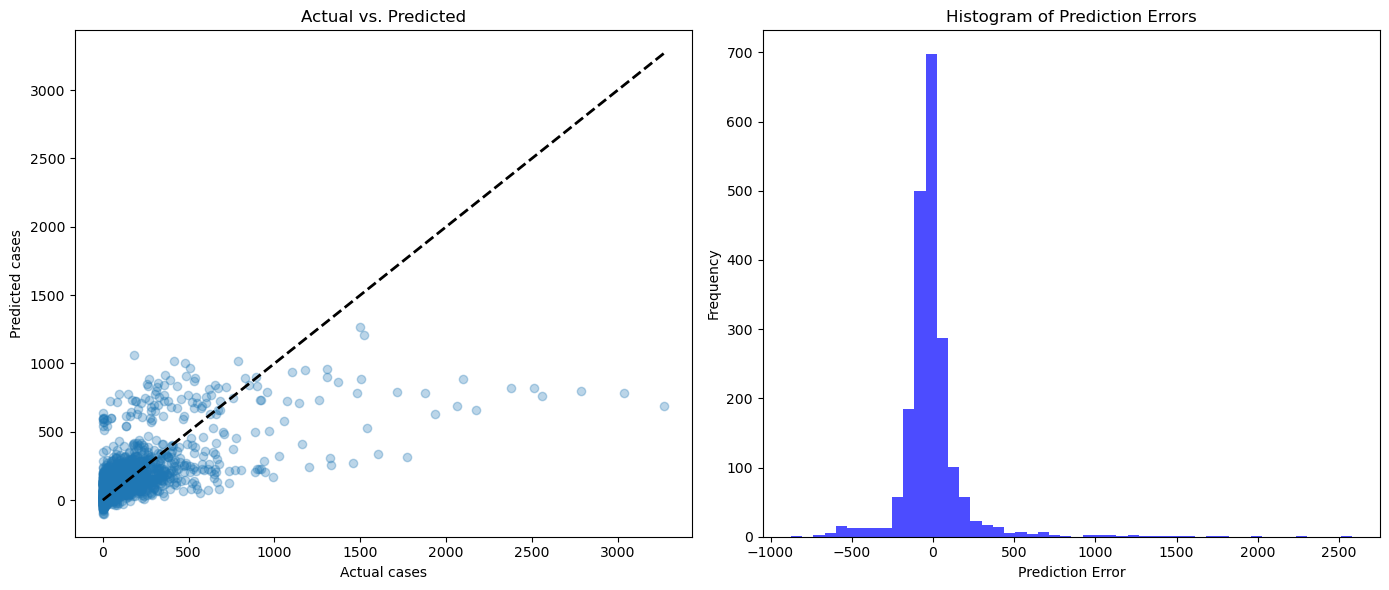

In [28]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train_scaled, y_train)
y_pred_lr = linear_regression_model.predict(X_test_scaled)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MSE: {mse_lr:.2f}, R2: {r2_lr:.2f}")

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].scatter(y_test, y_pred_lr, alpha=0.3)
axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axs[0].set_title('Actual vs. Predicted')
axs[0].set_xlabel('Actual cases')
axs[0].set_ylabel('Predicted cases')

residuals = y_test - y_pred_lr
axs[1].hist(residuals, bins=50, alpha=0.7, color='blue')
axs[1].set_title('Histogram of Prediction Errors')
axs[1].set_xlabel('Prediction Error')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Decision Tree Regressor - MSE: 24879.34, R2: 0.64


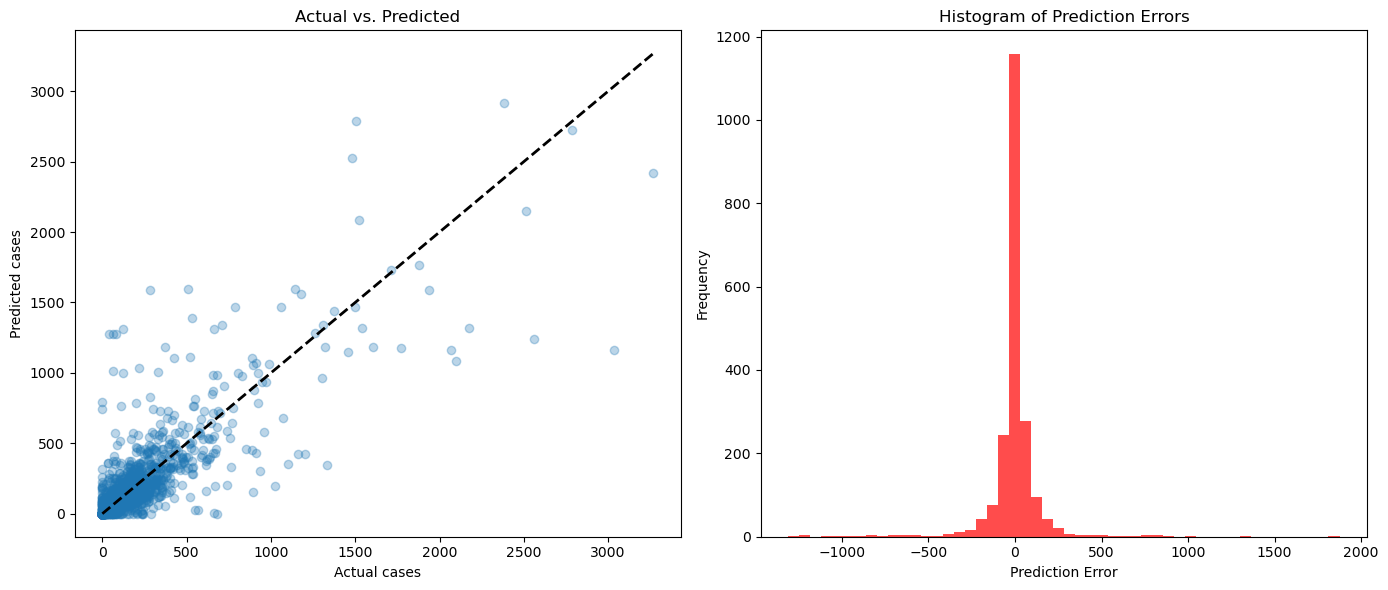

In [29]:
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train_scaled, y_train)
y_pred_dt = decision_tree_model.predict(X_test_scaled)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Regressor - MSE: {mse_dt:.2f}, R2: {r2_dt:.2f}")

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

axs[0].scatter(y_test, y_pred_dt, alpha=0.3)
axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axs[0].set_title('Actual vs. Predicted')
axs[0].set_xlabel('Actual cases')
axs[0].set_ylabel('Predicted cases')

residuals_dt = y_test - y_pred_dt
axs[1].hist(residuals_dt, bins=50, alpha=0.7, color='red')
axs[1].set_title('Histogram of Prediction Errors')
axs[1].set_xlabel('Prediction Error')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()